In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix


In [ ]:
# Step 2: Load and explore the dataset
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.info())
print(data.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
# Step 3: Select relevant features
features = ['GrLivArea', 'TotRmsAbvGrd', 'FullBath']
target = 'SalePrice'


In [ ]:
# Nettoyage des données : suppression des lignes avec des valeurs manquantes dans les colonnes pertinentes
data = data[features + [target]].dropna()

In [ ]:
# Préparation des données
X = data[features]
y = data[target]


In [ ]:
# Normalisation des données
X = (X - X.mean()) / X.std()

In [ ]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

In [ ]:
# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 36801.70142548172
Mean Squared Error (MSE): 3234537183.9084816
R² Score: 0.5783051337663179


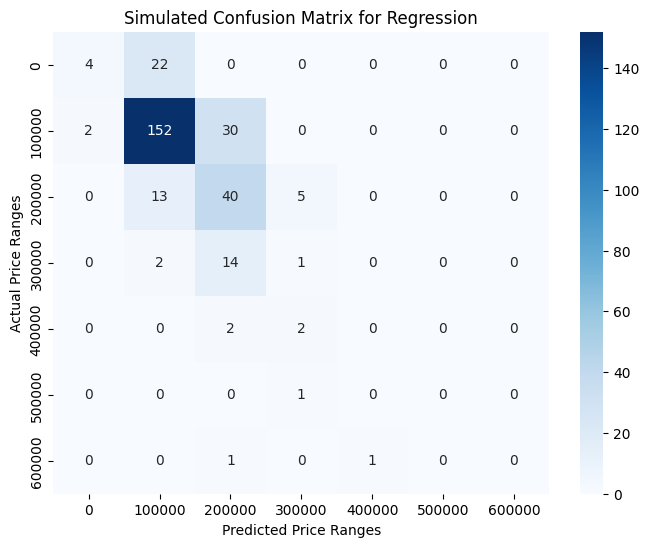

In [ ]:
# Visualisation des performances du modèle

# 1. Matrice de confusion simulée pour la régression
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, max(y_test.max(), y_pred.max())]
y_test_binned = pd.cut(y_test, bins=bins, labels=range(len(bins) - 1))
y_pred_binned = pd.cut(y_pred, bins=bins, labels=range(len(bins) - 1))

conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=bins[:-1], yticklabels=bins[:-1])
plt.xlabel('Predicted Price Ranges')
plt.ylabel('Actual Price Ranges')
plt.title('Simulated Confusion Matrix for Regression')
plt.show()

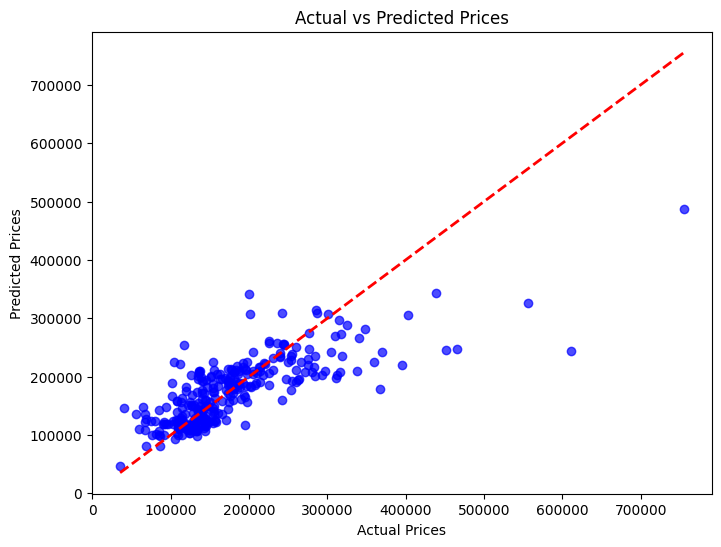

In [ ]:
# 2. Graphique des valeurs réelles vs prédites
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, c='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

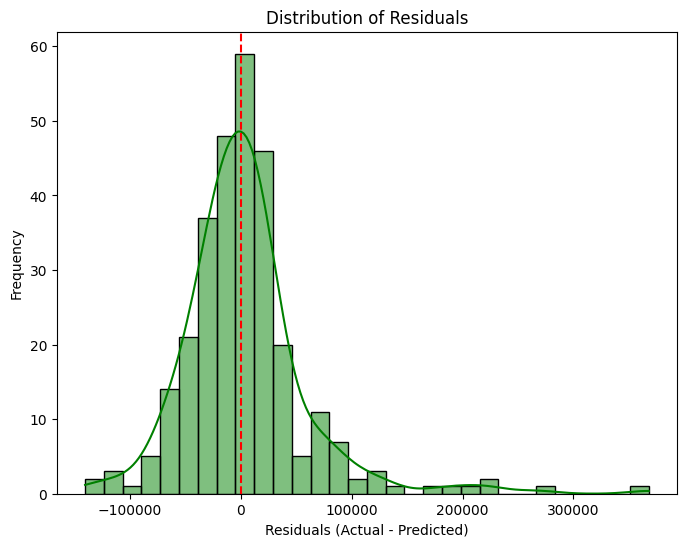

In [ ]:
# 3. Distribution des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

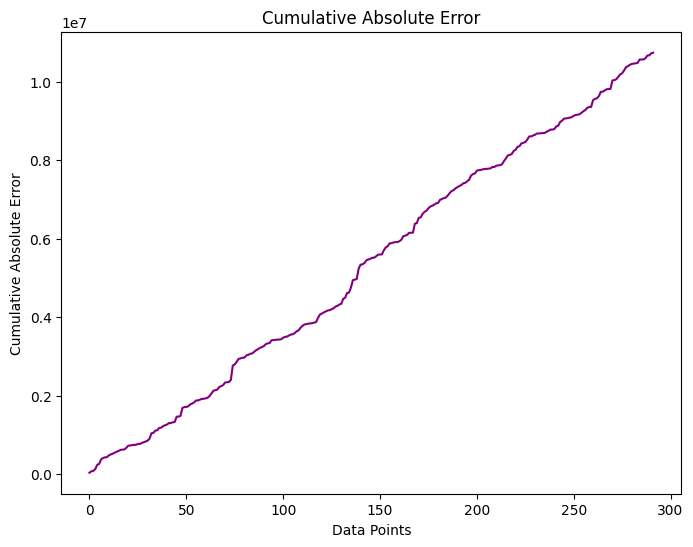

In [ ]:
# 4. Erreur cumulée absolue
cumulative_errors = np.cumsum(np.abs(residuals))
plt.figure(figsize=(8, 6))
plt.plot(range(len(cumulative_errors)), cumulative_errors, color='purple')
plt.xlabel('Data Points')
plt.ylabel('Cumulative Absolute Error')
plt.title('Cumulative Absolute Error')
plt.show()